In [1]:
# 1. Install required packages
# Run this once in your environment
# pip install kaggle pandas sqlite3

import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
# %pip install seaborn

In [2]:
print(os.getcwd())

/Users/mac2025/Desktop/Continuous Education/Scaler/Sessions/Portfolio_projects/BeginnerSQLProject


In [3]:
# 3. Load CSV into pandas
df = pd.read_csv('../BeverageSalesData.csv')

### Sales over the years

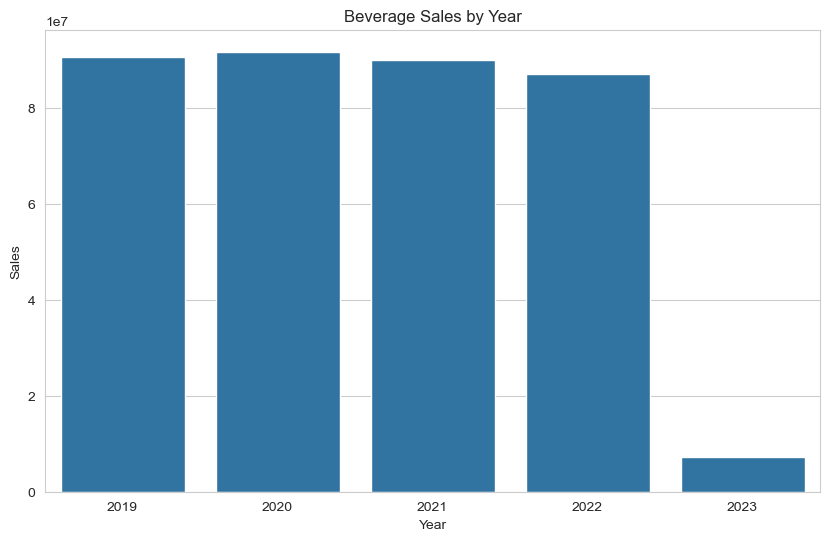

In [4]:
#Set date column to datetime format and extract year
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])
df['Year'] = df['TransactionDate'].dt.year

#Aggregate Sales by Year
sales_by_year = df.groupby('Year')['SalesValue'].sum().reset_index()

#Set the style and figure
sns.set_style("whitegrid")
plt.figure(figsize = (10,6))

#Create the chart
sns.barplot(x='Year',y='SalesValue', data = sales_by_year)
plt.title("Beverage Sales by Year")
plt.xlabel('Year')
plt.ylabel('Sales')
plt.show()

### Top 5 countries by Sales and PRofit

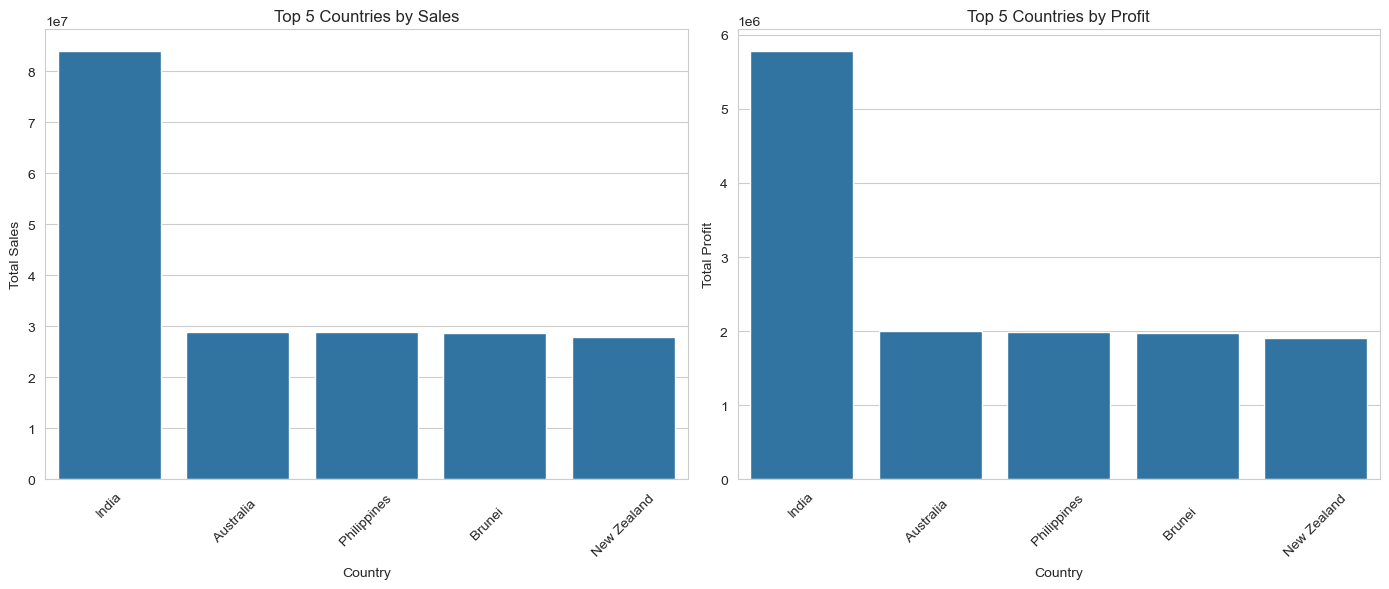

In [6]:
#Aggregating the data by Country
country_agg = df.groupby('Country').agg({
    'SalesValue': 'sum',
    'Profit': 'sum'
}).reset_index()

#Top countries by Sales
top_countries = country_agg.nlargest(5, 'SalesValue')

#Setting the style and figure
sns.set_style("whitegrid")
plt.figure(figsize=(14, 6))

# First subplot for Sales
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
sns.barplot(x='Country', y='SalesValue', data=top_countries)
plt.title('Top 5 Countries by Sales')
plt.xlabel('Country')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)

# Second subplot for Profit
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
sns.barplot(x='Country', y='Profit', data=top_countries)
plt.title('Top 5 Countries by Profit')
plt.xlabel('Country')
plt.ylabel('Total Profit')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Packing impcat on sales in India

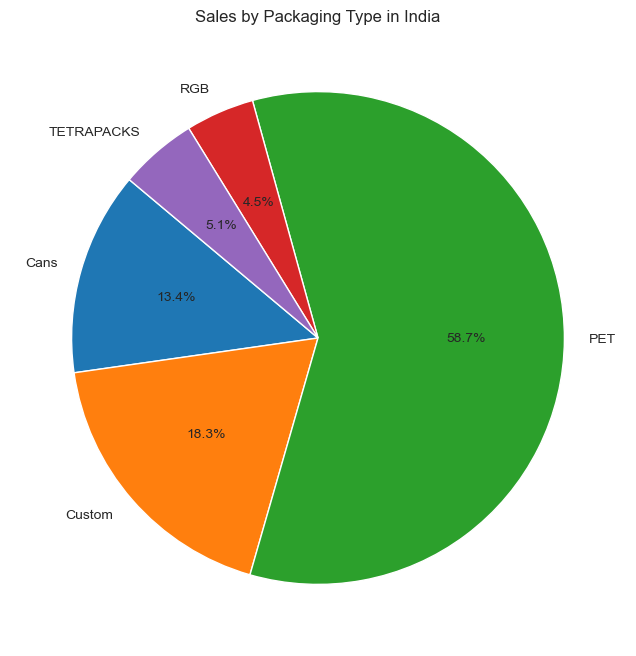

In [7]:
#Aggregating Sales in INDIA
india_sales = df[df['Country'].str.upper()== 'INDIA']
india_sales_packaging = india_sales.groupby('PackagingType')['SalesValue'].sum().reset_index()

# Setting the style
sns.set_style("whitegrid")

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(india_sales_packaging['SalesValue'], labels=india_sales_packaging['PackagingType'],
        autopct='%1.1f%%', startangle=140)
plt.title('Sales by Packaging Type in India')
plt.show()

### Product by sales and cost per unit

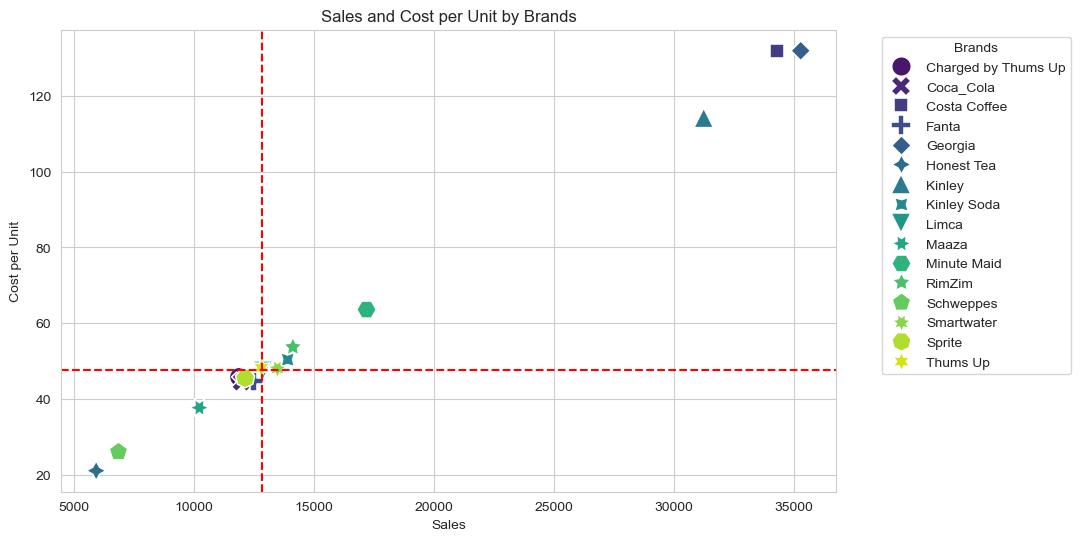

In [8]:
#Aggregating the Sales and Cost per Unit by Brand
brand_data = df.groupby('Brand').agg({
    'SalesValue':'mean',
    'CostPerUnit':'mean'
})

#Set the style and figure
sns.set_style("whitegrid")
plt.figure(figsize = (10,6))

#Create a scatterplot
sns.scatterplot(x="SalesValue", y= "CostPerUnit", data = brand_data,
                hue = "Brand", style = 'Brand', palette ='viridis',s=200)

#Create Quandrant Axis
median_sales = brand_data['SalesValue'].median()
median_cost = brand_data['CostPerUnit'].median()

plt.axhline(y=median_cost, color ='red', linestyle = '--')
plt.axvline(x=median_sales, color ='red', linestyle = '--')

#Set the title,labels and legends
plt.title("Sales and Cost per Unit by Brands")
plt.xlabel("Sales")
plt.ylabel("Cost per Unit")
plt.legend(title='Brands', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Outcomes
1. With this analysis, we were able to observe the total sales of beverages and sales being constant over the years. We can assess the need for more strategic campaigns as sales have been stagnant in recent years.
2. As most of the sales are coming only from India, the focus on the other countries with market potential should be prioritized.
3. With some of our beverages performing poorly despite having low cost per unit is a big concern. The strategies should be made for those products as they are not contributing significantly to overall sales.